# Alpaca

A team of researchers from Stanford University developed an open-source language model called Alpaca. It is based on Meta's large-scale language model LLaMA. The team used OpenAI's GPT API (text-davinci-003) to fine tune the LLaMA 7 billion (7B) parameters sized model. The goal of the team is to make AI available for everyone for free so that academicians can do further research without worrying about expensive hardwares to execute these memory-intensive algorithms. Although these open source models are not available for commercial use, small businesses can still utilize it for building their own chatbots.

## How does Alpaca work

The Stanford team began their research with the smallest language model among LLaMA models, which was the LLaMA 7B model, and pre-trained it with 1 trillion tokens. They started with the 175 human-written instruction-output pairs from the self-instruct seed set. They then used OpenAI API to ask ChatGPT to generate more instructions using the seed set. It is to obtain roughly 52,000 sample conversations, which the team used to further fine-tune the LLaMA models using Hugging Face's training framework.

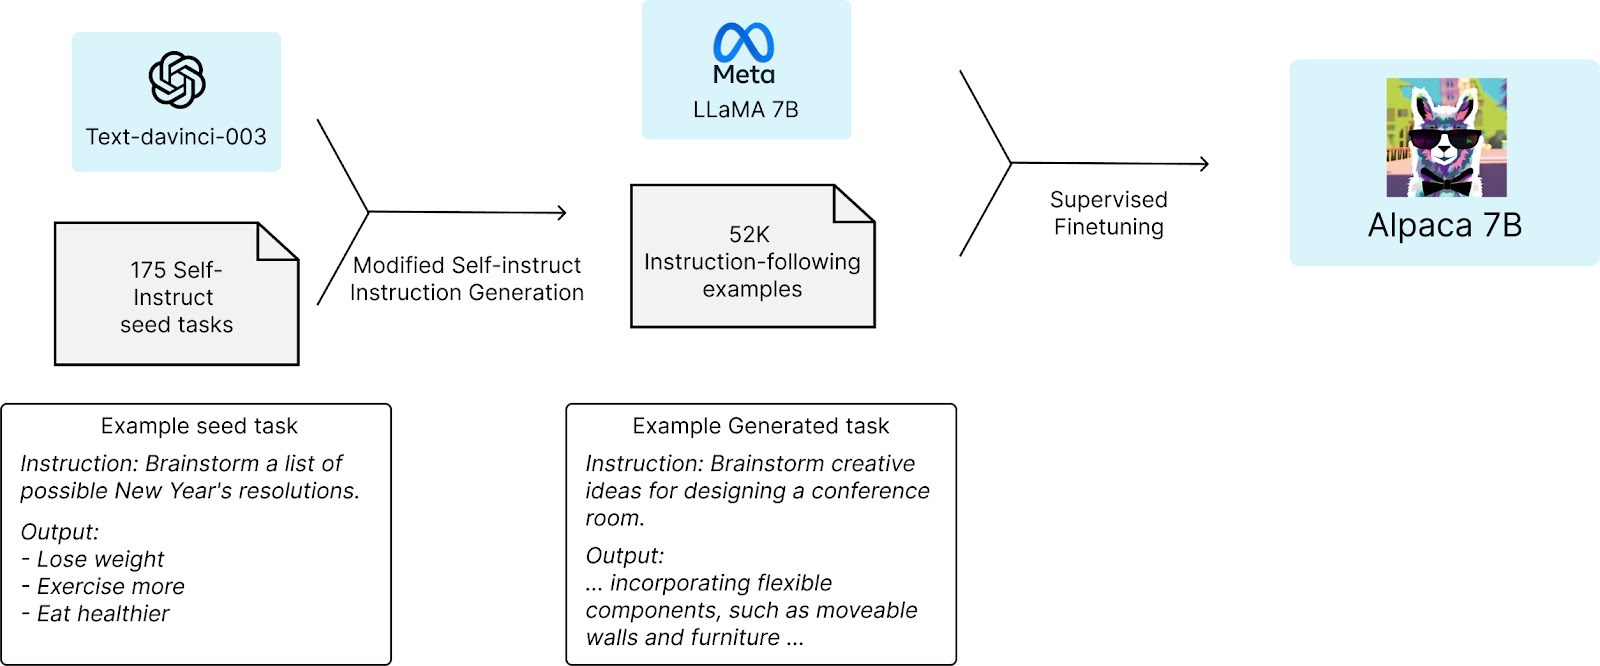

LLaMA comes at several sizes - 7B, 13B, 30B, and 65B parameters. Alpaca was also extended to 13B, 30B, and 65B models.

## Performance : Alpaca
The Alpaca model was tested against ChatGPT in tasks such as email creation, social media, and productivity tools, and Alpaca won 90 times while ChatGPT won 89 times. The model can be used in real world for various purposes. It will be a great help for researchers for ethical AI and cyber security activities like detecting scamming and phishing.

##Limitations : Alpaca
Like commercial version of ChatGPT, Alpaca also has similar limitations i.e. suffers from hallucinations, toxicity, and stereotypes. In other words, it can be used to generate text which spreads misinformation, racism and hatred towards vulnerable sections of society.

## Memory Requirements : Alpaca
It can't run on CPU, requires GPU. For 7B and 13B models it requires a single GPU with 12GB of RAM. For 30B model you need more system resources.

##Python Code : Alpaca
I have created example below. You can use it for your reference. Since I am using free version of Colab, I am running smallest model 7B. You can change it to 13B and 30B.

Similar to the commercial interface of ChatGPT, the output of the code results in a web interface created in Gradio. Moreover, you can use this interface for demonstration purposes and share it with colleagues or clients.

https://colab.research.google.com/drive/1FUIag7sSnZ94nnoWAMJqY2lSORDq75sW?usp=sharing

https://www.youtube.com/watch?v=JzBR8oieyy8&ab_channel=SamWitteveen

### Install Dependencys and import libs

In [ ]:
!pip install -q datasets loralib sentencepiece
!pip uninstall transformers
!pip install -q git+https://github.com/zphang/transformers@c3dc391
!pip -q install git+https://github.com/huggingface/peft.git
!pip -q install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 13.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40

In [ ]:
from peft import PeftModel
from transformers import LLaMATokenizer, LLaMAForCausalLM, GenerationConfig
import textwrap


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//172.28.0.1'), PosixPath('8013'), PosixPath('http')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('--logtostderr --listen_host=172.28.0.12 --

In [ ]:
tokenizer = LLaMATokenizer.from_pretrained("decapoda-research/llama-7b-hf")

model = LLaMAForCausalLM.from_pretrained(
    "decapoda-research/llama-7b-hf",
    load_in_8bit=True,
    device_map="auto",
)
model = PeftModel.from_pretrained(model, "samwit/alpaca7B-lora")

Overriding torch_dtype=None with `torch_dtype=torch.float16` due to requirements of `bitsandbytes` to enable model loading in mixed int8. Either pass torch_dtype=torch.float16 or don't pass this argument at all to remove this warning.


Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

### Add in a method for processing querys

In [ ]:
def alpaca_talk(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
    )
    input_ids = inputs["input_ids"].cuda()

    generation_config = GenerationConfig(
        temperature=0.6,
        top_p=0.95,
        repetition_penalty=1.2,
    )
    print("Generating...")
    generation_output = model.generate(
        input_ids=input_ids,
        generation_config=generation_config,
        return_dict_in_generate=True,
        output_scores=True,
        max_new_tokens=256,
    )
    for s in generation_output.sequences:
        print(tokenizer.decode(s))

## Next Use the method to ask a full Query
here we can now use our awsome new method to ask a full query and get a full responce

In [ ]:
input_text ='''Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is Batman and how is he different to The Joker?

### Response:
'''

alpaca_talk(input_text)

Generating...
 Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
What is Batman and how is he different to The Joker?

### Response:
Batman is a superhero who fights crime using his martial arts skills, advanced technology, and detective abilities. He differs from The Joker in many ways; for example, while both are vigilantes, Batman has no desire for chaos or destruction whereas The Joker seeks to cause as much mayhem as possible.


## Concltion
this model is both powerful and accurate with a wealth of knowledge in its base version to use